# Practical Session 2
## Biomedical Signals and Images
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Evgenia Papavasileiou, Mumtaz Hussain Soomro and Jef Vandemeulebroucke


### Purpose
The purpose of this exercise session is to obtain insight in the signal processing, filtering and detection operations commonly applied in medical signal analysis. For more information on these concepts see the course slides and the related material.

The jupyter notebook should be submitted as the report of each practical session by teams of two students. In [colab](https://colab.research.google.com/notebooks/welcome.ipynb) you should download the notebook in the format *.ipynb and save it as a pdf version through print->save as pdf. Both the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline.The deadline for the report submission is November 26, 2020, at 23.59.

Any report sent after the deadline will not be graded. 

### Required modules

- [numpy](https://pypi.org/project/numpy/)
- [pylab](https://scipy.github.io/old-wiki/pages/PyLab)
- [scipy](https://www.scipy.org/getting-started.html)

### 1. Signal Denoising
ECG signals are usually distorted by a combination of high and low frequency noise as well as artificats of the frequency of the power line. The low frequency noise may be removed by using a highpass filter and the noise of
high frequency may be removed by using a lowpass filter.
### 1.1 Power Line Interference
Alternating current in the United States and several other countries oscillates at a frequency of 60 Hz and in the EU around 50 Hz. Those oscillations often corrupt measurements and have to be subtracted. Filtering of power line interference is very meaningful in the measurement of biomedical events, particularly in the case of recording signals as weak as the ECG. This kind of disturbance can be modeled by a sinusoid with respective frequency and random phase. Generally, methods used to reduce this kind of disturbance can be divided into two groups: methods based in spectral domain and methods based in time domain. Typically, for reduction of the AC interference in a spectral domain, a fixed or adaptive notch filter is used, i.e. a band-stop filter with a narrow stopband, while in time domain a moving average filter is often used.

### Exercise 1: Removal of Power Line Interference

- In python, load the noisy ECG signal ECG.mat using function [scipy.io.loadmat](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html).
Use functions [numpy.ndarray.astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) to convert the values to float and function [numpy.ndarray.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) to collapse the array in one dimension.
- Plot the signal in time domain with a sampling frequency fs=200Hz.

- Calculate the fourier transform of the signal using the [fft](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) function and plot its magnitude. <Br>


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


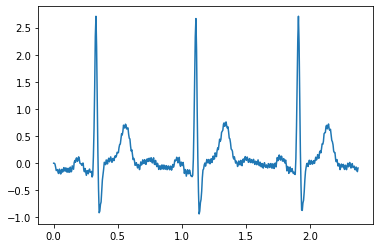

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
mat = sp.io.loadmat('/content/gdrive/My Drive/Biomedical Signals and Images/WPO2/ECG.mat')
ECG_data = mat['ecg']
ECG_data = ECG_data.astype(float)
ECG_data = ECG_data.flatten()
length = len(ECG_data)
fs = 200
time = np.linspace(0, (1/fs) * length, length, endpoint= False)
plt.plot(time, ECG_data)

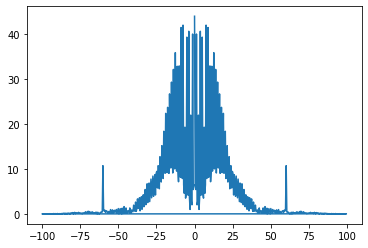

In [ ]:
fourier_transform = np.fft.fft(ECG_data)
freq = np.fft.fftfreq(length, d= 1/fs)
plt.plot(freq, abs(fourier_transform))

Where do you see the frequency of the power line?<br>
<font color=blue>Your answer here:</font>It can be seen clearly at a frequency of 60 Hz.

- Design a notch filter that remove the frequency of the power line that you observed from the above spectrum. Use the following [scipy.signal.iirnotch](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html) function with a Quality factor=30. Plot the magnitude of the filter. 
- Filter the noisy ECG signal using the python function [filtfilt](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.filtfilt.html) and plot the filtered signal in the time domain.
- Calculate the Fourier transform of the ECG signal after filtering and plot its magnitude. <br>
 


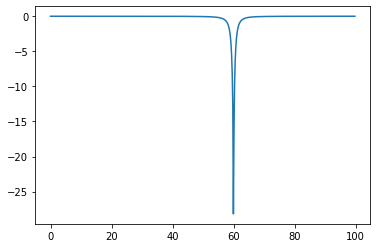

In [ ]:
from scipy import signal
b, a = signal.iirnotch(60, 30, fs)
w, h = signal.freqz(b, a, fs= fs)
plt.plot(w, 20 * np.log10(abs(h)))

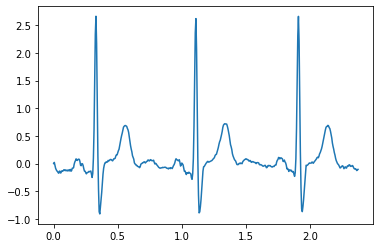

In [ ]:
filtered_ECG = signal.filtfilt(b, a, ECG_data)
plt.plot(time, filtered_ECG)

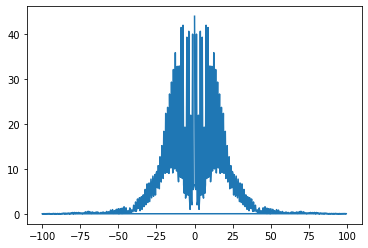

In [ ]:
fourier_transform_filteredECG = np.fft.fft(filtered_ECG)
plt.plot(freq, abs(fourier_transform_filteredECG))

What do you observe from the frequency spectrum of the filtered ECG signal?<br>
<font color=blue> Your answer here: </font> It is obviously visible that the frequency of power line is filtered.

### 1.2 Digital Filters
Digital filters are systems that function on discrete signals to reduce or enhance specific aspects of the signal. In this exercise we will focus on filters that are used to improve the Signal to Noise ratio (SNR) of a signal, i.e. we will use filters to remove the noise from an ECG signal. A filter is defined by its transfer function in the z-domain or by its difference equation. The general transfer function for a linear, time-invariant, digital filter is defined as in (1)

\begin{equation*}
H(z) =\frac{b[0]+b[1]z^{-1}+b[2]z^{-2}+...+b[K]z^{-K}}{1+a[1]z^{-1}+a[2]z^{-2}+...+a[L]z^{-L}} = 
\frac{ \sum_{k=0}^K b[k]z^{-k}} { \sum_{l=0}^L a[l]z^{-l}} \quad\quad\quad\quad\quad\quad\quad\quad \text{(1)}
\end{equation*}

The corresponding difference equation is then

\begin{equation*}
y(n) = \sum_{k=0}^K b[k]x[n-k] - \sum_{l=0}^L a[l]y[n-l]      \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{(2)}
\end{equation*}

A special case of (1), (2) occurs if we set $a_{l}$ = 0 for l = 1, ..., L. Then we get the system in equation (3) which is known as the weighted moving average of the input signal.

\begin{equation*}
\quad\quad\ y(n) = \sum_{k=0}^K b[k]x[n-k]   \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{(3)}
\end{equation*}

The coefficients b[k] are known as the <b>weights</b>, or filter coefficients, or the weighting function or impulse response and K is known as the <b>length</b> of the filter.

### Exercise 2: ECG signal denoising using moving average fiter
- Load the ECG signal ECG1.mat as in previous exercise. Use functions [numpy.ndarray.astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) to convert the values to float and function [numpy.ndarray.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) to collapse the array in one dimension. 
- Plot the signal in the time domain. Use sampling frequency fs = 1024Hz.
- Design a 3-points and a 7-points moving average filter. Each filter has equal weights. To define the filter you should define the b and a coefficients of the [filtfilt](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.filtfilt.html) function. Use this to filter the noisy signal.
- Plot three subgraphs the one under the other. The first plot should contain the original signal and the others the filtered signal after the application of the two moving average filters. Plot the filtered signals <b>on top</b> of the original signal. 



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


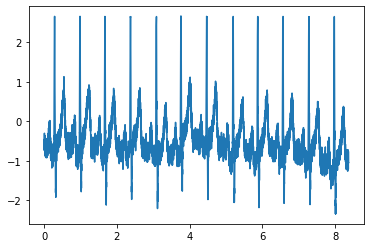

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
mat = sp.io.loadmat('/content/gdrive/My Drive/Biomedical Signals and Images/WPO2/ECG12.mat')
ECG12_data = mat['ecg_hfn']
ECG12_data = ECG12_data.astype(float)
ECG12_data = ECG12_data.flatten()
fs = 1024
length = len(ECG12_data)
time = np.linspace(0, (1/fs) * length, num= length, endpoint= False)
plt.plot(time, ECG12_data)

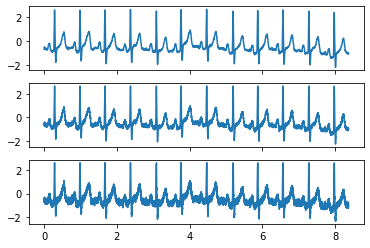

In [ ]:
b_3points = np.ones(3)/3
b_7points = np.ones(7)/7
a_3points = a_7points = np.ones(1)
threepoints_filtered = signal.filtfilt(b_3points, a_3points, ECG12_data)
sevenpoints_filtered = signal.filtfilt(b_7points, a_7points, ECG12_data)
fig, axs = plt.subplots(3, sharex=True)
axs[0].plot(time, sevenpoints_filtered)
axs[1].plot(time, threepoints_filtered)
axs[2].plot(time, ECG12_data)

Which filter removes the noise better and why? <br>
<font color=blue>Your answer here: </font> As the plots illustrate, the 7-points filter is the best for the filtration because the more points a moving average filter has, the more random amplitude it can reduce.

### 3. Peak detection
### Exercise 3: Peak Detection from ECG signals
In this exercise you will create an algorithm for the detection of the QRS wave of an ECG signal by implementing the following steps:¶
- Step 1: Load the ECG signal ECGQRS.mat as in the previous exercises and plot it in the time domain using sampling frequency fs = 200Hz.
- Step 2: Normalize the ECG singal in the range of [0-1] by dividing with the maximum absolute value. Plot the normalized signal.
- Step 3: Filter the signal you obtain from the previous step with a bandpass filter by cascading a low pass digital filter with cutoff frequency of 12 Hz and a high pass digital filter with cutoff frequency of 5Hz. Use function [scipy.signal.butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) to create the filters whose order be 3 and function [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) to filter the signal. Plot the filtered signals after each step.
- Step 4: Filter the signal of the previous step with a derivative filter that has the transfer function, i.e. h = [-1, -2, 0, 2, 1]/8. This will allow you to define the b and a coefficients. Again use [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) to filter the signal. Plot the filtered signal
- Step 5: Perform Squaring on the ECG signal you obtain after the derivative filter. Plot the filtered signal.
- Step 6: Filter the squared signal with a 30 point moving average filter. Plot the filtered signal.
- Step 7: Using [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function for finding the QRS complexes. Use distance 150 for the R and S peaks and prominence between 0.05 and 0.3 for the Q peaks. Plot the QRS complexes on top of the original signal.
- Step 8: Calculate the heart beat using the following formula. Heart Rate = 60/RRinterval in seconds.



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


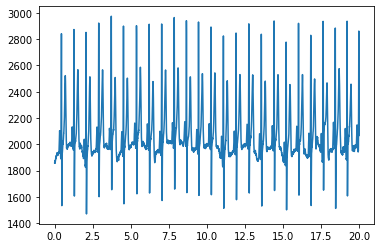

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
mat = sp.io.loadmat('/content/gdrive/My Drive/Biomedical Signals and Images/WPO2/ECGQRS3.mat')
ECGQRS_data = mat['ECG']
ECGQRS_data = ECGQRS_data.astype(float)
ECGQRS_data = ECGQRS_data.flatten()
fs = 200
length = len(ECGQRS_data)
time = np.linspace(0, (1/fs) * length, num= length, endpoint= False)
plt.plot(time, ECGQRS_data)

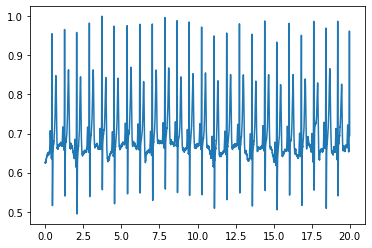

In [ ]:
max_value = max(ECGQRS_data)
normalised_ECGQRS = ECGQRS_data/max_value
plt.plot(time, normalised_ECGQRS)

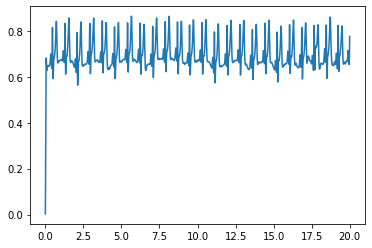

In [ ]:
b_low, a_low = signal.butter(3, 12, fs= 200)
lowFiltered_ECGQRS = signal.lfilter(b_low, a_low, normalised_ECGQRS)
plt.plot(time, lowFiltered_ECGQRS)

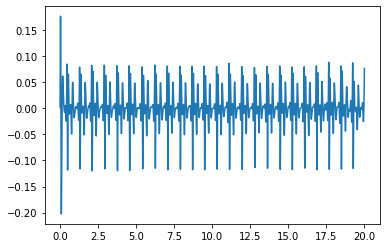

In [ ]:
b_high, a_high = signal.butter(3, 5, btype='high', fs= 200)
highFiltered_ECGQRS = signal.lfilter(b_high, a_high, lowFiltered_ECGQRS)
plt.plot(time, highFiltered_ECGQRS)

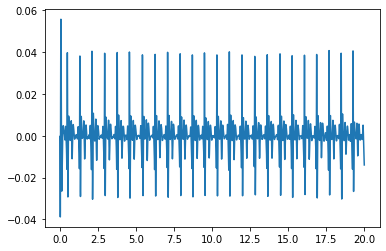

In [ ]:
b_derivative = [-1/8, -2/8, 0/8, 2/8, 1/8]
derivativeFiltered_ECGQRS = signal.lfilter(b_derivative, 1, highFiltered_ECGQRS)
plt.plot(time, derivativeFiltered_ECGQRS)

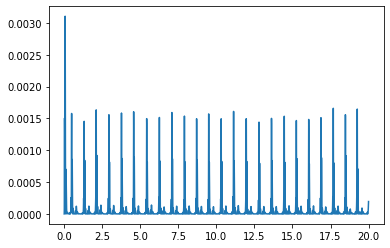

In [ ]:
squared_ECG = derivativeFiltered_ECGQRS**2
plt.plot(time, squared_ECG)

[]

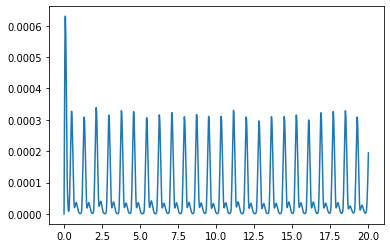

In [ ]:
b_30points = np.ones(30)/30
thirtypoints_filtered = signal.filtfilt(b_30points, 1, squared_ECG)
plt.plot(time, thirtypoints_filtered)

49


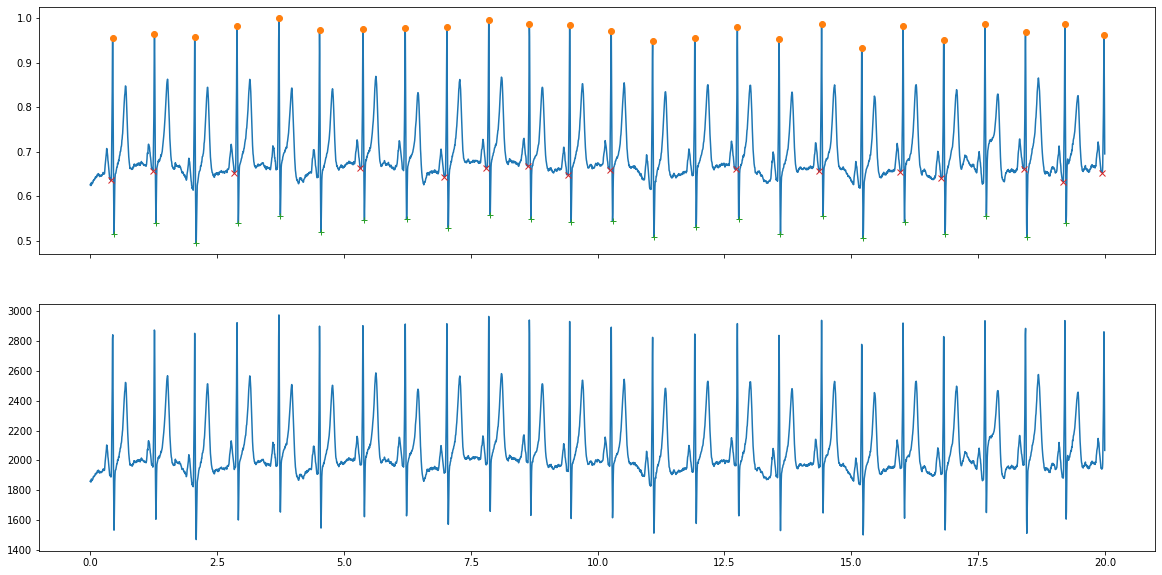

In [ ]:
R_complex,_ = signal.find_peaks(normalised_ECGQRS, distance= 150)
S_complex,_ = signal.find_peaks(-normalised_ECGQRS, distance= 150)
Q_complex,_ = signal.find_peaks(-normalised_ECGQRS, prominence= (0.05, 0.3))
Q_diffs = np.diff(Q_complex)
modified_Q_complex = [] 
for i in range(len(Q_diffs)):
  if Q_diffs[i] > 90:
    modified_Q_complex.append(Q_complex[i])
modified_Q_complex.insert(0, Q_complex[0])
modified_Q_complex.insert(0, Q_complex[48])
fig, axs = plt.subplots(2, sharex= True)
axs[0].plot(time, normalised_ECGQRS) 
axs[0].plot(time[R_complex], normalised_ECGQRS[R_complex], 'o')
axs[0].plot(time[S_complex], normalised_ECGQRS[S_complex], '+')
axs[0].plot(time[modified_Q_complex], normalised_ECGQRS[modified_Q_complex], 'x')
axs[1].plot(time, ECGQRS_data)
plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
time_diffs = np.diff(time[R_complex])
RR_interval = sum(time_diffs)/len(time_diffs)
Heart_Rate = 60/RR_interval
print(f'Heart Rate= {round(Heart_Rate)}')

Heart Rate= 74.0


What is the Heart Rate?<br>
<font color=blue>Your answer here: </font> In fact, every successive QRS complex interval is a heart beat and heart rate is average number of heart beat in a minute.